## Prerequisites

In [1345]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install regex
# !pip install matplotlib
# !pip install scipy
# !pip install PyEnchant

Import the necessary python libraries to do the exploratory data analysis.

In [1346]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import enchant

%matplotlib inline

plt.style.use('bmh')

carroya_df = pd.read_csv('carroya_data.csv')
tucarro_df = pd.read_csv('tucarro_data.csv')

## First glance at the datasets

### CarroYa

In [1347]:
carroya_df.head()

,Unnamed: 0,NOMBRE,SUBTITULO,PRECIO,PRECIO MENSUAL,KILOMETRAJE,ANIO,TIPO DE CAJA,CILINDRAJE,COMBUSTIBLE,COLOR,ESTADO,UBICACIÓN,DIRECCIÓN,PLACA,PUERTAS,AIRBAGS,IMAGEN
0,0,Mercedes Benz Clase GLA,200 Automatico,$122.900.000,$3.058.891,22.036 km,2020,Secuencial,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
1,1,Volkswagen Tiguan,2.0 Comfortline 4MOTION,$99.900.000,$2.486.438,39.024 km,2018,Secuencial,2.0,Gasolina,Otro,usado,Bogotá D.C.,NaN,**6 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
2,2,Jaguar XE,Prestige 2.0 T,$102.900.000,$2.561.105,15.192 km,2017,Secuencial,2.0,Gasolina,Negro,usado,Bogotá D.C.,NaN,**3 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
3,3,Mitsubishi Outlander,Phev,$105.900.000,$2.635.773,46.690 km,2017,Automática,2.0,Híbrido,Gris,usado,Bogotá D.C.,NaN,**8 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
4,4,Mercedes Benz Clase CLA,200,$122.900.000,$3.058.891,22.036 km,2020,Automática,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...


In [1348]:
carroya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10880 non-null  int64  
 1   NOMBRE          10880 non-null  object 
 2   SUBTITULO       6977 non-null   object 
 3   PRECIO          10880 non-null  object 
 4   PRECIO MENSUAL  10880 non-null  object 
 5   KILOMETRAJE     10880 non-null  object 
 6   ANIO            10880 non-null  int64  
 7   TIPO DE CAJA    10852 non-null  object 
 8   CILINDRAJE      10880 non-null  float64
 9   COMBUSTIBLE     9616 non-null   object 
 10  COLOR           10787 non-null  object 
 11  ESTADO          10880 non-null  object 
 12  UBICACIÓN       10880 non-null  object 
 13  DIRECCIÓN       7811 non-null   object 
 14  PLACA           10200 non-null  object 
 15  PUERTAS         695 non-null    float64
 16  AIRBAGS         1923 non-null   object 
 17  IMAGEN          10880 non-null 

Some numeric columns were identified as object by pandas. CILINDRAJE and PUERTAS that have integers values were misidentified as floating-point values. PRECIO, PRECIO MENSUAL and KILOMETRAJE have undesired characters ("$", "km", ".").

In [1349]:
carroya_df.isnull().sum().sort_values(ascending = False)

PUERTAS           10185
AIRBAGS            8957
SUBTITULO          3903
DIRECCIÓN          3069
COMBUSTIBLE        1264
PLACA               680
COLOR                93
TIPO DE CAJA         28
UBICACIÓN             0
ESTADO                0
Unnamed: 0            0
NOMBRE                0
CILINDRAJE            0
ANIO                  0
KILOMETRAJE           0
PRECIO MENSUAL        0
PRECIO                0
IMAGEN                0
dtype: int64

Some columns such as PUERTAS and AIRBAGS have too many missing values. SUBTITULO and DIRECCIÓN also have a significant amount of NaN values.

### TuCarro

In [1350]:
tucarro_df.head()

,Titulo,Marca,Modelo,Ano,Color,Tipo de combustible,Puertas,Transmision,Motor,Tipo de carroceria,Kilometros,Img,Precio
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,1938.0,NaN,Gasolina,4.0,Mecánica,NaN,Sedán,100000 km,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...,70.000.000
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,1946.0,BEIGE BLANCO,Gasolina,2.0,Mecánica,2200,NaN,100000 km,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...,40.000.000
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,1950.0,NaN,Gasolina,3.0,Mecánica,NaN,NaN,123 km,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...,30.000.000
3,Jeep Willys Cj3a,Jeep,Willys,1951.0,NaN,Gasolina,2.0,Mecánica,NaN,NaN,3000 km,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...,43.000.000
4,Ford F100,Ford,F-100,1952.0,Gris,Gasolina,2.0,Mecánica,1500,Pick-Up,125000 km,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...,26.000.000


In [1351]:
tucarro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26829 entries, 0 to 26828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               26827 non-null  object 
 1   Marca                26778 non-null  object 
 2   Modelo               26778 non-null  object 
 3   Ano                  26778 non-null  float64
 4   Color                16518 non-null  object 
 5   Tipo de combustible  26773 non-null  object 
 6   Puertas              26656 non-null  float64
 7   Transmision          26778 non-null  object 
 8   Motor                22628 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Kilometros           26777 non-null  object 
 11  Img                  26827 non-null  object 
 12  Precio               26827 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.7+ MB


Ano y Puertas that have integers values were recognized as floating-point values by pandas. Kilometros have undesired characters ("km", ".").

In [1352]:
tucarro_df.isnull().sum().sort_values(ascending = False)

Color                  10311
Tipo de carroceria      4308
Motor                   4201
Puertas                  173
Tipo de combustible       56
Kilometros                52
Marca                     51
Modelo                    51
Ano                       51
Transmision               51
Titulo                     2
Img                        2
Precio                     2
dtype: int64

Color have too many NaN values, Tipo de carrroceria and Motor also have a significant amout of missing values. Precio is missing 2 values, probably we're going to drop that rows.

## Joining the datasets

In [1353]:
def get_marca(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[:2])
    else:
        return " ".join(arr[:1])
    
def get_modelo(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[2:])
    else:
        return " ".join(arr[1:])
    
carroya_df['Marca'] = carroya_df['NOMBRE'].apply(get_marca)
carroya_df['Modelo'] = carroya_df['NOMBRE'].apply(get_modelo)
carroya_df = carroya_df.rename(columns = {'PRECIO' : 'Precio', 'TIPO DE CAJA' : 'Transmision',
                                          'ANIO' : 'Anio', 'COMBUSTIBLE' : 'Tipo de combustible',
                                         'KILOMETRAJE' : 'Kilometros', 'IMAGEN' : 'Img', 
                                         'COLOR' : 'Color', 'PUERTAS' : 'Puertas',
                                          'CILINDRAJE' : 'Motor'})
carroya_df['Titulo'] = carroya_df['NOMBRE'] + ' ' + carroya_df['SUBTITULO'].fillna('')
carroya_df = carroya_df.drop(columns = ['NOMBRE', 'SUBTITULO', 'PRECIO MENSUAL', 'ESTADO',
                                        'UBICACIÓN', 'DIRECCIÓN', 'PLACA', 'AIRBAGS',
                                        'Unnamed: 0'])
tucarro_df = tucarro_df.rename(columns = {'Ano' : 'Anio'})
cols = ['Titulo','Marca', 'Modelo', 'Precio', 'Anio', 'Kilometros', 'Color', 'Transmision',
        'Tipo de combustible','Tipo de carroceria', 'Motor', 'Puertas', 'Img']
tucarro_df = tucarro_df[cols]

In [1354]:
df = pd.concat([tucarro_df, carroya_df], ignore_index = True, axis = 0)
df = df.reset_index(drop = True)

In [1355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               37707 non-null  object 
 1   Marca                37658 non-null  object 
 2   Modelo               37658 non-null  object 
 3   Precio               37707 non-null  object 
 4   Anio                 37658 non-null  float64
 5   Kilometros           37657 non-null  object 
 6   Color                27305 non-null  object 
 7   Transmision          37630 non-null  object 
 8   Tipo de combustible  36389 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Motor                33508 non-null  object 
 11  Puertas              27351 non-null  float64
 12  Img                  37707 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.7+ MB


In [1356]:
df.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,70.000.000,1938.0,100000 km,NaN,Mecánica,Gasolina,Sedán,NaN,4.0,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,40.000.000,1946.0,100000 km,BEIGE BLANCO,Mecánica,Gasolina,NaN,2200,2.0,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,30.000.000,1950.0,123 km,NaN,Mecánica,Gasolina,NaN,NaN,3.0,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...
3,Jeep Willys Cj3a,Jeep,Willys,43.000.000,1951.0,3000 km,NaN,Mecánica,Gasolina,NaN,NaN,2.0,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...
4,Ford F100,Ford,F-100,26.000.000,1952.0,125000 km,Gris,Mecánica,Gasolina,Pick-Up,1500,2.0,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...


In [1357]:
df.tail()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
37704,Toyota Starlet,Toyota,Starlet,$16.000.000,1999.0,16.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37705,Dodge Caravan,Dodge,Caravan,$89.000.000,2019.0,16.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37706,Mitsubishi Lancer,Mitsubishi,Lancer,$30.000.000,2005.0,1.600.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37707,JEEP Commander,JEEP,Commander,$135.000.000,2019.0,20.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37708,Dodge Dart,Dodge,Dart,$20.000.000,2019.0,25.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg


Now the datasets are joined, but still have NaN values, misidentified Dtypes and unwanted characters in some columns.

## Data cleaning

### Numerical variables

In [1358]:
def clean_int(column, pattern, df):
    df[column] = df[column].replace(pattern, '', regex = True).astype(np.int64)

def clean_puerta(door):
    if pd.isna(door):
        door = 4
    return door

def get_number(number):
    if len(number) == 1:
        if int(number) > 7:
            number += '00'
        else:
            number += '000'
    elif len(number) == 2:
        number += '00'
    elif len(number) == 3:
        if int(number) < 700:
            number += '0'
    elif len(number) > 4:
        number = number[:4]
    return number

def clean_cilindraje(cilindraje):
    if cilindraje == '0.0':
        number = np.NaN
    else:
        number = re.sub('[\.]', '', cilindraje)
        number = get_number(number)
    return number

def clean_motor(motor):
    if motor == '0.0':
        number = np.NaN
    else:
        numbers = re.findall(r'[-+]?\d*\.\d+|\d+', motor)
        if len(numbers) > 0:
            if len(numbers) == 2:
                number = numbers[0] if float(numbers[0]) > float(numbers[1]) else numbers[1]
                number = re.sub('[\.]', '', number)
            else:
                number = re.sub('[\.]', '', numbers[0])
            number = get_number(number)
        else:
            number = np.NaN
        return number

Since we have NaN in important columns such as Precio, Marca, Modelo y Kilometros, and are less than 150 rows, which only represents 0.3% of the data, we're going to drop them.

In [1359]:
df = df[df['Kilometros'].notna()]

In [1360]:
clean_int('Precio', '[.$]', df) 
clean_int('Kilometros', '[km.]', df)
df['Motor'] = df['Motor'].astype(str)
df['Motor'] = df['Motor'].apply(clean_motor)
df['Motor'] = df['Motor'].astype('float').astype('Int64')
df['Puertas'] = df['Puertas'].astype('Int64')
df['Puertas'] = df['Puertas'].fillna(4)
df['Anio'] = df['Anio'].astype(int)

### Categorical variables

In [1361]:
def clean_marca(marca):
    marca_list = marca.split()
    marca_temp = marca_list[0]
    marca_temp = marca_temp.title()
    suggest = pwl.suggest(marca_temp)
    if suggest and marca_temp != 'Land' and marca != 'Land':
        marca = suggest[0]
    elif len(marca_list) > 1:
        marca_temp = marca_temp + ' ' + marca_list[1].title()
        suggest = pwl.suggest(marca_temp)
        if suggest:
            marca = suggest[0]
    elif marca == 'Land':
        marca = 'Land Rover'
    return marca

def clean_modelo(modelo):
    suggest = pwl.suggest(modelo)
    temp_modelo = modelo
    if suggest:
        modelo = suggest[0]
        print(temp_modelo + '-->' + modelo)
    else:
        print(modelo)
    return modelo

def clean_color(color):
    temp_color = color
    color_list = color.split()
    color = color.title()
    suggest = pwl.suggest(color_list[0].title())
    if suggest and color.upper() != 'NO DISPONIBLE' and color.upper() != 'OTRO':
        color = suggest[0]
        #print(temp_color + ' --> ' + color)
    elif len(color_list) > 1 and color.upper() != 'NO DISPONIBLE' and color.upper() != 'OTRO':
        suggest = pwl.suggest(color_list[1].title())
        if suggest:
            color = suggest[0]
        #print(temp_color + ' --> ' + color)
    #else:
        #print(color)
    return color

def write_models():
    file = open('models.txt','w')
    for model in models:
        file.write(model + '\n')
    file.close()

#### Marca

In [1362]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Willys', 'Ford', 'Volkswagen', 'Chevrolet',
       'Mercury', 'Toyota', 'Land Rover', 'FARGO 60', 'wolswagen',
       'Jeep Willys', 'Mercedes-Benz', 'Nissan', 'Renault', 'Daihatsu',
       'Fiat', 'DAHIATSU', 'BMW', 'Lada', 'Suzuki', 'Aro',
       'Willys Servicio Publ', 'Kia', 'Honda', 'Subaru', 'Porsche',
       'Mitsubishi', 'Volkswagen Mk1 turbo', 'Volvo', 'Renault 4 R4',
       'Mazda', 'Acura', 'SPRINT NEGRO', 'Tyota', 'Oldsmobile', 'Mini',
       'Hyundai', 'Daewoo', 'Dacia', 'Cadillac', 'Peugeot', 'Skoda',
       'Audi', 'Citroën', 'Mitsubishi 7 puestos', 'Baic', 'Chrysler',
       'Alfa Romeo', 'Nissan D 21', 'Plymouth', 'Sprint', 'Iveco', 'SEAT',
       'Dahiatsu', 'Lexus', 'General', 'Ssangyong', 'Pontiac',
       'Gran cherokee límite', 'Huinday accent', 'Rover', 'Camioneta luv',
       'volskwagen', 'GMC', 'honda civic',
       'Toyota Land Cruiser 4.7 Vxr Uzj100', 'NPR', 'Tata', 'Mazda323',
       'Hummer', 'Maserati', 'CitroÃ«n', 'Ssanyong',
   

In [1363]:
print(len(df['Marca'].unique()))

203


In [1364]:
pwl = enchant.request_pwl_dict("brands.txt")

df['Marca'] = df['Marca'].apply(clean_marca)
df['Marca'] = df['Marca'].replace(['RENAULT-DUSTER'], 'Renault')
df['Marca'] = df['Marca'].replace(['Camioneta Dong Feng'], 'Dongfeng')
df['Marca'] = df['Marca'].replace(['D-MAX'], 'Chevrolet')
df['Marca'] = df['Marca'].replace(['Camion Mercedes benz'], 'Mercedes-Benz')
df['Marca'] = df['Marca'].replace(['SPRINT NEGRO'], 'Chevrolet')
df['Marca'] = df['Marca'].replace(['Wolkwanguen'], 'Volkswagen')
df['Marca'] = df['Marca'].replace(['ZX'], 'Zhongxing')
df['Marca'] = df['Marca'].replace(['Willys'], 'Jeep')
df['Marca'] = df['Marca'].replace(['Camioneta KIA PREGIO'], 'Kia')
removals = df['Marca'].value_counts().reset_index()
removals = removals[removals['Marca'] >= 10]['index'].values
df = df[df['Marca'].isin(removals)]
df = df.reset_index(drop = True)
df['Marca'].value_counts()

Chevrolet        5307
Renault          4117
Ford             2911
Toyota           2845
Mazda            2590
Nissan           2586
Kia              2225
Volkswagen       2076
Mercedes-Benz    1883
BMW              1803
Hyundai          1240
Audi              817
Suzuki            757
Mitsubishi        618
Jeep              556
Honda             519
Dodge             510
Peugeot           467
Volvo             350
Ssangyong         278
Citroen           247
Fiat              247
Mini              245
Land Rover        219
Subaru            217
Chery             212
Porsche           161
Seat              157
Skoda             120
Daihatsu          112
Acura             108
Jaguar            105
JBC                99
Daewoo             85
Lexus              77
DFM/DFSK           77
Changan            66
Foton              59
DS                 45
MG                 43
Alpina             41
Baic               33
Zotye              30
RAM                29
JMC                28
Hafei     

In [1365]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Ford', 'Volkswagen', 'Chevrolet', 'Toyota',
       'Land Rover', 'Mercedes-Benz', 'Nissan', 'Renault', 'Daihatsu',
       'Fiat', 'BMW', 'Suzuki', 'Kia', 'Honda', 'Subaru', 'Porsche',
       'Mitsubishi', 'Volvo', 'Mazda', 'Acura', 'Mini', 'Hyundai',
       'Daewoo', 'Cadillac', 'Peugeot', 'Skoda', 'Audi', 'Citroen',
       'Baic', 'Chrysler', 'Alpina', 'Seat', 'Lexus', 'Ssangyong',
       'Hummer', 'Maserati', 'Hafei', 'Foton', 'DFM/DFSK', 'Chery',
       'Zotye', 'Jinbei', 'Lifan', 'Geely', 'RAM', 'Changan', 'JBC',
       'BYD', 'MG', 'Mahindra', 'JMC', 'Brilliance', 'Changhe', 'Jaguar',
       'DS'], dtype=object)

In [1366]:
print(len(df['Marca'].unique()))

57


In [1367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               37539 non-null  object
 1   Marca                37539 non-null  object
 2   Modelo               37539 non-null  object
 3   Precio               37539 non-null  int64 
 4   Anio                 37539 non-null  int64 
 5   Kilometros           37539 non-null  int64 
 6   Color                27219 non-null  object
 7   Transmision          37512 non-null  object
 8   Tipo de combustible  36275 non-null  object
 9   Tipo de carroceria   22485 non-null  object
 10  Motor                29763 non-null  Int64 
 11  Puertas              37539 non-null  Int64 
 12  Img                  37539 non-null  object
dtypes: Int64(2), int64(3), object(8)
memory usage: 3.8+ MB


#### Modelo

In [1368]:
df['Modelo'].unique()

array(['dodge desoto D8', 'Willys', 'willys Cj3a', ..., 'Scrambler',
       'Rover Freelander', 'LS 400'], dtype=object)

In [1369]:
df['Modelo'].value_counts()

3               856
Prado           788
Duster          757
Logan           687
Sandero         553
               ... 
I-10 GL           1
Korando C         1
Cord              1
5008 GT Line      1
1                 1
Name: Modelo, Length: 1611, dtype: int64

In [1370]:
print(len(df['Modelo'].unique()))

1611


In [1371]:
removals = df['Modelo'].value_counts().reset_index()
removals = removals[removals['Modelo'] >= 3]['index'].values
df = df[df['Modelo'].isin(removals)]
df = df.reset_index(drop = True)

In [1372]:
print(len(df['Modelo'].unique()))

816


In [1373]:
df['Modelo'].value_counts()

3              856
Prado          788
Duster         757
Logan          687
Sandero        553
              ... 
F-250            3
Caravan          3
KUV100           3
Terrano II       3
New Elantra      3
Name: Modelo, Length: 816, dtype: int64

In [1374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36573 entries, 0 to 36572
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               36573 non-null  object
 1   Marca                36573 non-null  object
 2   Modelo               36573 non-null  object
 3   Precio               36573 non-null  int64 
 4   Anio                 36573 non-null  int64 
 5   Kilometros           36573 non-null  int64 
 6   Color                26530 non-null  object
 7   Transmision          36548 non-null  object
 8   Tipo de combustible  35354 non-null  object
 9   Tipo de carroceria   22179 non-null  object
 10  Motor                29371 non-null  Int64 
 11  Puertas              36573 non-null  Int64 
 12  Img                  36573 non-null  object
dtypes: Int64(2), int64(3), object(8)
memory usage: 3.7+ MB


In [1375]:
models_df = pd.read_csv('model_data.csv', sep = ";")
models = models_df['Model'].unique()
pwl = enchant.request_pwl_dict("models.txt")

#write_models()
#df['Modelo'] = df['Modelo'].apply(clean_modelo)
#df['Modelo'] = df['Modelo'].apply(lambda x: x.upper())
#df.head()

#### Color

In [1376]:
df['Color'] = df['Color'].fillna('No Disponible')

In [1377]:
print(len(df['Color'].unique()))

871


In [1378]:
pwl = enchant.request_pwl_dict("colors.txt")

df = df.drop(df.index[df['Color'] == 'CDN753'])
df = df.drop(df.index[df['Color'] == 'WOX712'])
df = df.drop(df.index[df['Color'] == 'ESP935'])
df = df.drop(df.index[df['Color'] == 'Gris/Beige'])
df = df.drop(df.index[df['Color'] == 'Negro-Blanco'])
df = df.drop(df.index[df['Color'] == 'BLANCO/GRIS/NEGRO/ROJO'])
df = df.drop(df.index[df['Color'] == 'Blanco/plata'])
df = df.drop(df.index[df['Color'] == 'MULTICOLOR'])
df = df.drop(df.index[df['Color'] == 'Negro-Naranja'])
df = df.drop(df.index[df['Color'] == 'MACHINE'])
df = df.drop(df.index[df['Color'] == 'Cantera metalizado'])
df = df.reset_index(drop = True)

df['Color'] = df['Color'].apply(clean_color)
df['Color'] = df['Color'].replace(['Rojo61062'], 'Rojo')
df['Color'] = df['Color'].replace(['Zinnoberot'], 'Rojo')
df['Color'] = df['Color'].replace(['Granate'], 'Rojo')
df['Color'] = df['Color'].replace(['Blancospino'], 'Blanco')
df['Color'] = df['Color'].replace(['Titanio Metalico'], 'Plateado')
df['Color'] = df['Color'].replace(['Vinotinto'], 'Rojo')
df['Color'] = df['Color'].replace(['Negromate'], 'Negro')
df['Color'] = df['Color'].replace(['Hipermetalico'], 'Plateado')
df['Color'] = df['Color'].replace(['Titanio'], 'Plateado')
df['Color'] = df['Color'].replace(['Aluminio Metálico'], 'Plateado')
df['Color'] = df['Color'].replace(['Titanio Flash'], 'Plateado')
df['Color'] = df['Color'].replace(['Titanium Flash'], 'Plateado')
df['Color'] = df['Color'].replace(['Metalizado'], 'Plateado')
df['Color'] = df['Color'].replace(['Metalico Radiante'], 'Plateado')
df['Color'] = df['Color'].replace(['Aluminio Metalico'], 'Plateado')
df['Color'] = df['Color'].replace(['Aluminioo Metalico'], 'Plateado')
df['Color'] = df['Color'].replace(['Vinotinto'], 'Rojo')
df['Color'] = df['Color'].replace(['Ultra-Azul'], 'Azul')
df['Color'] = df['Color'].replace(['Silver'], 'Plateado')
df['Color'] = df['Color'].replace(['Nacar Metalizado'], 'Nacar')
df['Color'] = df['Color'].replace(['Nacar Metalico'], 'Nacar')
df['Color'] = df['Color'].replace(['Marron'], 'Cafe')
df['Color'] = df['Color'].replace(['Indefinido'], 'No Disponible')
df['Color'] = df['Color'].replace(['Según Disponibilidad'], 'No Disponible')
df['Color'] = df['Color'].replace(['Otro'], 'No Disponible')

In [1379]:
df['Color'].unique()

array(['Beige', 'No Disponible', 'Gris', 'Rojo', 'Habano', 'Azul',
       'Verde', 'Amarillo', 'Blanco', 'Negro', 'Celeste', 'Plateado',
       'Lila', 'Naranja', 'Dorado', 'Cafe', 'Violeta', 'Rosa', 'Champaña',
       'Nacar', 'Sahara', 'Ocre', 'Tan'], dtype=object)

In [1380]:
df['Color'].value_counts()

No Disponible    12424
Gris              6574
Blanco            5737
Plateado          3881
Rojo              2497
Negro             2267
Azul              1832
Verde              444
Beige              281
Dorado             229
Amarillo           152
Cafe               143
Naranja             39
Tan                 14
Lila                11
Violeta              9
Celeste              8
Rosa                 5
Nacar                5
Champaña             3
Habano               3
Ocre                 2
Sahara               1
Name: Color, dtype: int64

In [1381]:
print(len(df['Color'].unique()))

23


#### Tipo de combustible

In [1382]:
def sumTC(type):
    return (df['Tipo de combustible'].values == type).sum()

df["Tipo de combustible"].replace({'Diésel':'Diesel'}, inplace=True)
df["Tipo de combustible"].replace({np.nan:'Gasolina'}, inplace=True)
df["Tipo de combustible"].replace({'Gasolina y gas':'Gasolina y Gas'}, inplace=True)
df["Tipo de combustible"].replace({'Gas Natural':'Gas'}, inplace=True)

print(df["Tipo de combustible"].unique())
for t in df["Tipo de combustible"].dropna().unique():
    print(t + ': ' + str(sumTC(t)))

['Gasolina' 'Diesel' 'Gasolina y Gas' 'Eléctrico' 'Híbrido' 'Gas']
Gasolina: 32051
Diesel: 3586
Gasolina y Gas: 422
Eléctrico: 147
Híbrido: 218
Gas: 137


Now the data is clean and we can analyze it.

## Data Analysis

In [1383]:
df.isnull().sum().sort_values(ascending = False)

Tipo de carroceria     14390
Motor                   7197
Transmision               25
Titulo                     0
Marca                      0
Modelo                     0
Precio                     0
Anio                       0
Kilometros                 0
Color                      0
Tipo de combustible        0
Puertas                    0
Img                        0
dtype: int64

In [1384]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,3.656100e+04,36561.000000,3.656100e+04,29364.000000,36561.000000
mean,7.209704e+07,2013.071141,1.260571e+05,2136.117934,4.328082
std,1.834817e+08,8.111872,5.360529e+06,953.712083,10.562407
min,1.250000e+03,1946.000000,0.000000e+00,16.000000,1.000000
25%,3.150000e+07,2011.000000,2.636200e+04,1600.000000,4.000000
50%,4.950000e+07,2015.000000,6.500000e+04,2000.000000,4.000000
75%,8.350000e+07,2018.000000,1.100000e+05,2500.000000,5.000000
max,2.808886e+10,2022.000000,9.967677e+08,9990.000000,2018.000000


The extremely high max value and low min value of Precio indicates that we might have dirty data and outliers.

In [1385]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
34986,Cadillac El Dorado 2.8L,Cadillac,El Dorado,28088855569,2021,25860,Gris,Automática,Diesel,NaN,1005,4,https://www.carroya.com/web/images/vehiculos/1...
27085,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,NaN,2580,4,https://www.carroya.com/web/images/vehiculos/1...
34976,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,NaN,2580,4,https://www.carroya.com/web/images/vehiculos/1...
30169,Nissan X-trail Classic,Nissan,X-trail Classic,1111111111,2011,11111111,Blanco,0,Gasolina,NaN,<NA>,4,https://www.carroya.com/web/images/vehiculos/2...
34973,AUDI A5 1.8 Cabrio TFSI Multitronic,Audi,A5,999999999,2021,1322234,Beige,Mecánica,Gasolina,NaN,2889,4,https://www.carroya.com/web/images/vehiculos/1...


In [1386]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
3592,Mazda 626 2.0 Na0,Mazda,626,1250,2006,2000,No Disponible,Mecánica,Gasolina,Sedán,2000,4,https://http2.mlstatic.com/D_NQ_NP_655221-MCO4...
641,Chevrolet Trooper 2.6 Dlx,Chevrolet,Trooper,1900,1990,1,Azul,Mecánica,Gasolina,Camioneta,2600,5,https://http2.mlstatic.com/D_NQ_NP_828624-MCO4...
1051,Chevrolet Trooper Standar 2400,Chevrolet,Trooper,1900,1994,251000,No Disponible,Mecánica,Gasolina,NaN,<NA>,3,https://http2.mlstatic.com/D_NQ_NP_681454-MCO4...
26003,Chevrolet Sail 1.4 Ltz Sport,Chevrolet,Sail,2334,2021,999999,No Disponible,Automática,Gasolina,Hatchback,1400,5,https://http2.mlstatic.com/D_NQ_NP_996784-MCO4...
1444,Mazda 626 Mazda 626 Matsuri,Mazda,626,5500,1996,7,No Disponible,Automática,Gasolina,NaN,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_986815-MCO4...


In [1387]:
temp = df.sort_values(by = ['Puertas'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
18737,Mazda 2 1.5 Touring,Mazda,2,53000000,2018,54000,Gris,Automática,Gasolina,Hatchback,<NA>,2018,https://http2.mlstatic.com/D_NQ_NP_934280-MCO4...
8663,Renault Master 2.5 Confort,Renault,Master,50000000,2012,267000,Blanco,Mecánica,Diesel,Furgón,2500,16,https://http2.mlstatic.com/D_NQ_NP_738629-MCO4...
1335,Toyota Land Cruiser Fzj80 Japonesa,Toyota,Burbuja,108000000,1996,170000,Rojo,Mecánica,Gasolina,Monovolumen,4500,9,https://http2.mlstatic.com/D_NQ_NP_965021-MCO4...
4557,Kia Rio 1.6 5 p,Kia,Rio,78000000,2009,78900,Negro,Automática,Gasolina,NaN,<NA>,8,https://http2.mlstatic.com/D_NQ_NP_621811-MCO4...
13317,Hyundai Grand i10 Illusion 1.2 Style 5 p,Hyundai,Grand i10,78000000,2015,78900,Blanco,Mecánica,Gasolina,NaN,<NA>,8,https://http2.mlstatic.com/D_NQ_NP_842469-MCO4...


In [1388]:
temp = df.sort_values(by = ['Kilometros'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
8859,Audi Q5 Luxury Turbo,Audi,Q5,62900000,2012,996767678,Azul,Automática,Gasolina,Camioneta,2000,5,https://http2.mlstatic.com/D_NQ_NP_891816-MCO4...
28936,Hyundai Veracruz,Hyundai,Veracruz,32000000,2008,159000000,Negro,Automática,Gasolina,NaN,3800,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
26927,Ford Escape 3.0 XLT 4x4 Automatica,Ford,Escape,29500000,2008,125000000,Gris,Automática,Gasolina,NaN,<NA>,4,https://www.carroya.com/web/images/vehiculos/2...
27791,Chevrolet Tracker 1.8 FWD LS Mecanica,Chevrolet,Tracker,43000000,2016,80000000,Gris,Mecánica,Gasolina,NaN,1800,4,https://www.carroya.com/web/images/vehiculos/2...
27875,Toyota FJ40,Toyota,FJ40,55000000,1978,67000000,No Disponible,Mecánica,Gasolina,NaN,4300,4,https://www.carroya.com/web/images/vehiculos/2...


In [1389]:
temp = df.sort_values(by = ['Motor'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
34349,Volkswagen T-Cross Confortline Plus Aut,Volkswagen,T-Cross,99990000,2021,0,Gris,Automática,Gasolina,NaN,9990,5,https://www.carroya.com/web/images/vehiculos/1...
28442,Renault Kwid Zen,Renault,Kwid,32500000,2020,29200,Gris,Mecánica,Gasolina,NaN,9990,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
32296,Volkswagen Cross Up 1.0,Volkswagen,Cross Up,25500000,2017,38000,Rojo,Mecánica,Gasolina,NaN,9990,4,https://www.carroya.com/web/images/vehiculos/1...
36088,Renault Kwid Life,Renault,Kwid,31000000,2021,7000,Blanco,0,Gasolina,NaN,9990,4,https://www.carroya.com/web/images/vehiculos/2...
30546,Renault Kwid Outsider,Renault,Kwid,35000000,2020,33000,Blanco,Mecánica,Gasolina,NaN,9990,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg


The dataset have cars with unreal prices like 1250 COP and exorbitant prices such as 28088855569 COP and 9999955566 COP, so we decided to put a minimum and maximum value of Precio in order to eliminate noise and have more reliable information. Kilometros and Puertas also have outliers

In [1390]:
df = df[(df['Precio'] > 3000000) & (df['Precio'] < 300000000)]

Since Puertas have values such as 2018, 16 and 9, but cars doesn't really have that amount of Puertas, we decided to delete Puertas > 6.

In [1391]:
df = df[df['Puertas'] <= 5]

There are some cars with ridiculous values for Kilometros, values > 5000000 are going to be deleted

In [1392]:
df = df[df['Kilometros'] < 5000000]

The biggest car engines are around 6500cc and 7500cc, so engines bigger than 7500 are probably typos and will be removed.

In [1393]:
df = df[(df['Motor'] > 400) & (df['Motor'] < 7500)]

To get ride of outliers, we're going to delete values +- 3 SD mean.

In [1394]:
df = df[(np.abs(stats.zscore(df['Precio'])) < 3)]

In [1395]:
df = df.reset_index(drop = True)

In [1396]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,2.822600e+04,28226.000000,2.822600e+04,28226.000000,28226.000000
mean,5.794638e+07,2012.917275,8.506103e+04,2079.516687,4.296925
std,3.854360e+07,7.690883,9.310218e+04,821.151730,0.810963
min,3.100000e+06,1946.000000,0.000000e+00,554.000000,1.000000
25%,3.080000e+07,2011.000000,3.327975e+04,1600.000000,4.000000
50%,4.650000e+07,2015.000000,6.990000e+04,2000.000000,4.000000
75%,7.500000e+07,2018.000000,1.120000e+05,2400.000000,5.000000
max,1.980000e+08,2022.000000,3.333333e+06,7133.000000,5.000000


In [1397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28226 entries, 0 to 28225
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               28226 non-null  object
 1   Marca                28226 non-null  object
 2   Modelo               28226 non-null  object
 3   Precio               28226 non-null  int64 
 4   Anio                 28226 non-null  int64 
 5   Kilometros           28226 non-null  int64 
 6   Color                28226 non-null  object
 7   Transmision          28215 non-null  object
 8   Tipo de combustible  28226 non-null  object
 9   Tipo de carroceria   20043 non-null  object
 10  Motor                28226 non-null  Int64 
 11  Puertas              28226 non-null  Int64 
 12  Img                  28226 non-null  object
dtypes: Int64(2), int64(3), object(8)
memory usage: 2.9+ MB


In [1398]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
20279,Bmw X4 30i 2021 2.0 Awd 159,BMW,X4,198000000,2021,4300,Blanco,Automática,Gasolina,Camioneta,2000,5,https://http2.mlstatic.com/D_NQ_NP_705704-MCO4...
7776,Toyota Sahara 4.5 Diésel Automática 7 Puestos 4x4,Toyota,SAHARA,198000000,2013,103000,Blanco,Automática,Diesel,Camioneta,4500,5,https://http2.mlstatic.com/D_NQ_NP_623907-MCO4...
15337,Toyota Prado 3.0 Tx-l Fl,Toyota,Prado,198000000,2017,31000,No Disponible,Automática,Diesel,Camioneta,3000,5,https://http2.mlstatic.com/D_NQ_NP_919676-MCO4...
19411,Mercedes-Benz Clase E 2.0 Cabriolet,Mercedes-Benz,Clase E,198000000,2020,2500,No Disponible,Automática,Gasolina,Convertible,2000,2,https://http2.mlstatic.com/D_NQ_NP_753248-MCO4...
19829,Toyota Hilux 2.8l,Toyota,Hilux,198000000,2020,29000,No Disponible,Automática,Diesel,Pick-Up,2800,2,https://http2.mlstatic.com/D_NQ_NP_723072-MCO4...


In [1399]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
1073,Renault R19 Rt 1.8,Renault,R19,3100000,1996,100000,No Disponible,Mecánica,Gasolina,Sedán,1800,4,https://http2.mlstatic.com/D_NQ_NP_624147-MCO4...
286,Mazda 626 1.8 L,Mazda,626,3200000,1986,12000,No Disponible,Mecánica,Gasolina,Sedán,1800,4,https://http2.mlstatic.com/D_NQ_NP_856780-MCO4...
23564,Chevrolet Monza 2.0 Mecanico,Chevrolet,Monza,3500000,1990,765564,Verde,Automática,Gasolina,NaN,2000,4,https://www.carroya.com/web/images/vehiculos/1...
263,Mazda 323 1.3 Hb,Mazda,323,3500000,1985,999,Violeta,Mecánica,Gasolina,Hatchback,1300,5,https://http2.mlstatic.com/D_NQ_NP_943444-MCO4...
21325,Mazda 323,Mazda,323,3500000,1984,51000,No Disponible,Mecánica,Gasolina,NaN,1400,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg


In [1400]:
def columnCategories(col):
    print(col + ": " + str(df[col].nunique()))

columnCategories("Titulo")
columnCategories("Marca")
columnCategories("Modelo")
columnCategories("Color")
columnCategories("Transmision")
columnCategories("Tipo de combustible")

Titulo: 8273
Marca: 57
Modelo: 752
Color: 22
Transmision: 7
Tipo de combustible: 6


## Visualization

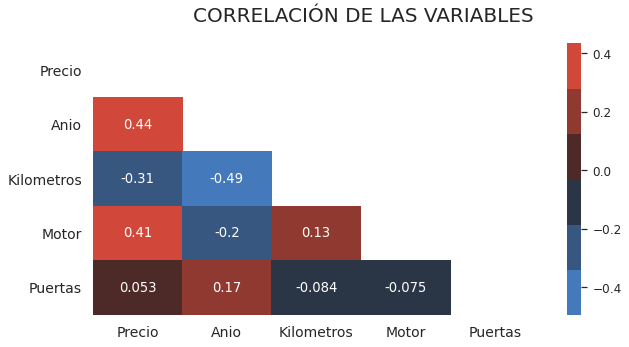

In [1401]:
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize = (10,5))
fig.suptitle('CORRELACIÓN DE LAS VARIABLES', fontsize=20)
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
cmap = sns.diverging_palette(250, 15, center="dark")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

plt.show()

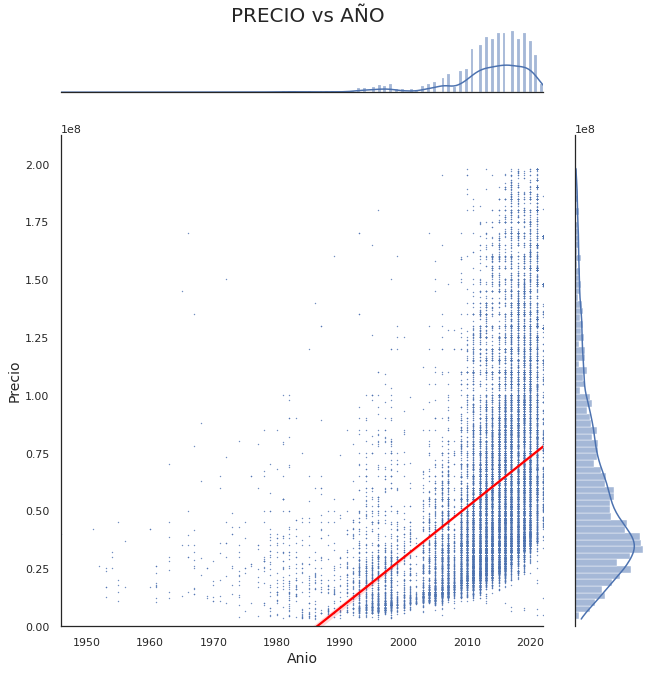

In [1402]:
sns.set_theme(style="white")
plot = sns.jointplot(data = df, x = 'Anio', y = 'Precio', color='b', kind = 'reg', line_kws={'color': 'red'}, scatter_kws={'s': 2})

plot.fig.suptitle('PRECIO vs AÑO', fontsize=20)
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)
plot.fig.set_size_inches(10,10)

plot.set_axis_labels('Anio', 'Precio', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

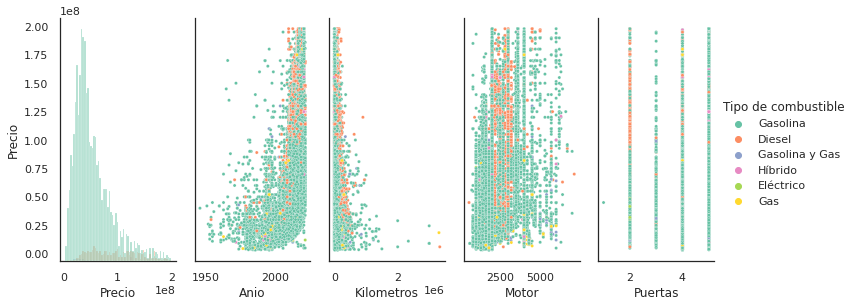

In [1403]:
x_vars = ["Precio", "Anio", "Kilometros", "Motor","Puertas"]
y_vars = ["Precio"]

graph = sns.PairGrid(data=df, hue='Tipo de combustible', x_vars=x_vars, y_vars=y_vars, palette="Set2", diag_sharey=True)
graph.fig.set_size_inches(10,5)

graph.map_offdiag(sns.scatterplot, s=10)
graph.map_diag(sns.histplot) 

graph.add_legend()

plt.show()

Chevrolet     4206
Ford          2257
Kia           1717
Mazda         2121
Nissan        2090
Others        8811
Renault       3309
Toyota        1996
Volkswagen    1719
Name: Marca, dtype: int64


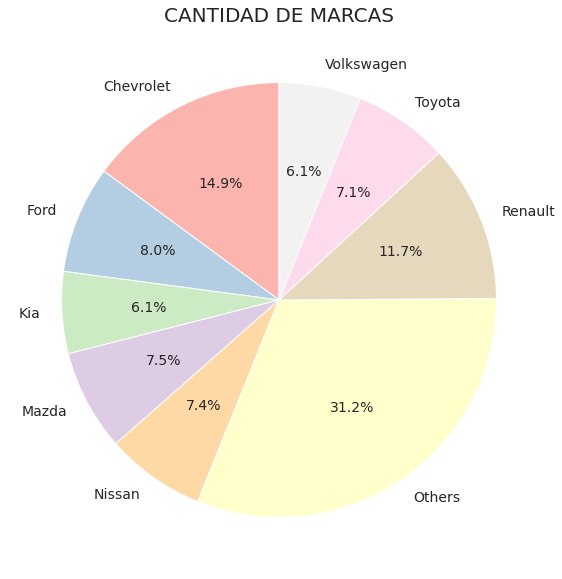

In [1404]:
lista_marcas = df['Marca'].unique()
conteo_marcas = df['Marca'].value_counts()[:8]
other = pd.Series([df['Marca'].value_counts().sum() - conteo_marcas.sum()], index=['Others'], name='Marca')

conteo_marcas = pd.concat([conteo_marcas, other], axis=0)
conteo_marcas = conteo_marcas.sort_index()

print(conteo_marcas)

conteo_marcas.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=90, fontsize=14, cmap='Pastel1')

plt.title('CANTIDAD DE MARCAS', fontsize=20)
plt.ylabel('')

plt.show()

<ipython-input-1405-5e4920501b10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.Marca[~dfm.Marca.str.contains('|'.join(list(conteo_marcas.index)))] = 0
/home/johan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/johan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
28225,Chevrolet Optra 1.8 Sedan Mecanico Sunroof,Chevrolet,Optra,21500000,2010,100000,Gris,Mecánica,Gasolina,NaN,1800,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
11001,Chevrolet Tracker 1.8 Ls,Chevrolet,Tracker,50000000,2015,44000,Blanco,Automática,Gasolina,Camioneta,1800,5,https://http2.mlstatic.com/D_NQ_NP_867510-MCO4...
4193,Chevrolet AVEO EMOTION 1.6 Gti,Chevrolet,AVEO EMOTION,22500000,2010,92000,Gris,Mecánica,Gasolina,Hatchback,1600,5,https://http2.mlstatic.com/D_NQ_NP_673837-MCO4...
19325,Chevrolet Tracker 1.8 Ls,Chevrolet,Tracker,68000000,2020,11120,Plateado,Mecánica,Gasolina,Camioneta,1800,5,https://http2.mlstatic.com/D_NQ_NP_973494-MCO4...
11008,Chevrolet D-Max 2.5l 4x2,Chevrolet,D-Max,65800000,2015,76000,Blanco,Mecánica,Diesel,Camioneta,2500,4,https://http2.mlstatic.com/D_NQ_NP_966384-MCO4...


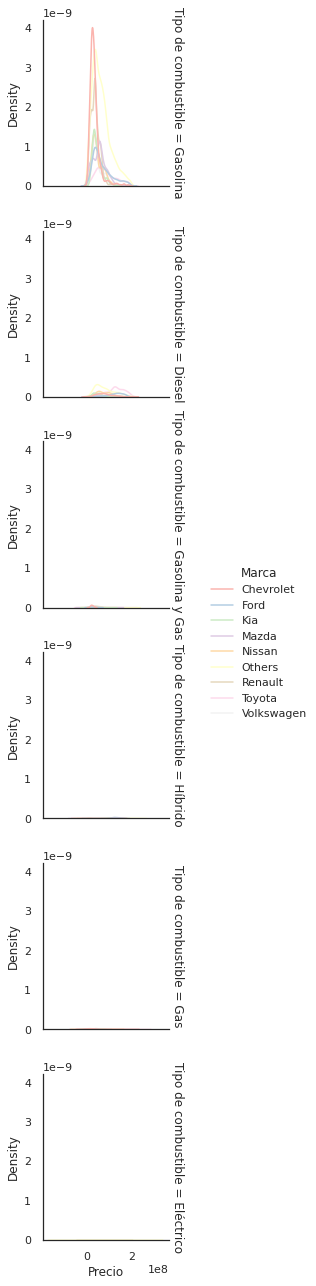

In [1405]:
sns.set_theme(style="white")

dfm = df.copy()
dfm_marca = dfm.Marca
dfm.Marca[~dfm.Marca.str.contains('|'.join(list(conteo_marcas.index)))] = 0
dfm['Marca'].replace({0:'Others'}, inplace=True)
dfm = dfm.sort_values(by=['Marca'])

sns.set_palette("Pastel1")

sns.displot(
    dfm, x="Precio", row="Tipo de combustible", hue='Marca',
    height=3,
    facet_kws=dict(margin_titles=True),
    kind="kde"
)
dfm.head()

## Generating the CSV files

In [1406]:
#df.to_csv('full_data.csv')

### CSV file without NaN values

In [1407]:
#df_no_nan = df.copy()
#df_no_nan['Color'].replace(['No Disponible'], np.nan, inplace = True)
#df_no_nan = df_no_nan.dropna()
#df_no_nan = df_no_nan.reset_index(drop = True)
#df_no_nan.to_csv('full_data_no_nan.csv')
#df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               12397 non-null  object
 1   Marca                12397 non-null  object
 2   Modelo               12397 non-null  object
 3   Precio               12397 non-null  int64 
 4   Anio                 12397 non-null  int64 
 5   Kilometros           12397 non-null  int64 
 6   Color                12397 non-null  object
 7   Transmision          12397 non-null  object
 8   Tipo de combustible  12397 non-null  object
 9   Tipo de carroceria   12397 non-null  object
 10  Motor                12397 non-null  Int64 
 11  Puertas              12397 non-null  Int64 
 12  Img                  12397 non-null  object
dtypes: Int64(2), int64(3), object(8)
memory usage: 1.3+ MB


### CSV file without NaN in Tipo de carroceria

In [1408]:
#df_carroceria_no_nan = df.copy()
#df_carroceria_no_nan = df_carroceria_no_nan[df_carroceria_no_nan['Tipo de carroceria'].notna()]
#df_no_nan.to_csv('full_data_carroceria_no_nan.csv')
#df_carroceria_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20043 entries, 1 to 21095
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               20043 non-null  object
 1   Marca                20043 non-null  object
 2   Modelo               20043 non-null  object
 3   Precio               20043 non-null  int64 
 4   Anio                 20043 non-null  int64 
 5   Kilometros           20043 non-null  int64 
 6   Color                20043 non-null  object
 7   Transmision          20043 non-null  object
 8   Tipo de combustible  20043 non-null  object
 9   Tipo de carroceria   20043 non-null  object
 10  Motor                20043 non-null  Int64 
 11  Puertas              20043 non-null  Int64 
 12  Img                  20043 non-null  object
dtypes: Int64(2), int64(3), object(8)
memory usage: 2.2+ MB
